#Laboratorio:
##Clasificador de canciones de Spotify

###Materia: *Elementos de aprendizaje de maquina y Big Data*

En este notebook de colab desarrollaremos los modelos de clasificacion solicitados para intentar lograr el objetivo de poder generar un clasificador que prediga las inclinaciones musicales de una persona, con un conjunto de datos real de la plataforma musical Spotify.



---



Importamos las primeras librerias que sabemos que vamos a utilizar:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Big data - Machine Learning 2023/Canciones_Spotify.csv') #abrimos el conjunto de datos

In [ ]:
data #damos un vistazo a los datos que se nos presentan

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


Seleccionamos las caracteristicas que en principio serian casi todas, para luego poder ver con cual nos quedaremos y con cuales no.

In [ ]:
# Identificar características y variable objetivo
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'mode']
X = data[features]
y = data['target']

#El eje X contendra las caracteristicas (datos), mientras que el eje y nuestros 'target'


Seleccion de las caracteristicas mas importantes:

Investigando formas de obtener las caracteristicas mas importantes para seleccionar y me den un porcentaje de prediccion mas alto, encontramos que  algunos algoritmos, como Random Forest, proporcionan una medida de la importancia de cada característica en la predicción. Se pueden acceder a estas puntuaciones de importancia de características para identificar las más relevantes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Entrenamos un clasificador de Random Forest
clf = RandomForestClassifier()
clf.fit(X, y)

#Obtenemos la importancia de las características
feature_importance = clf.feature_importances_
relevant_features = pd.Series(feature_importance, index=features).sort_values(ascending=False)
print(relevant_features)

instrumentalness    0.137444
loudness            0.124488
speechiness         0.109364
energy              0.101803
duration_ms         0.100987
danceability        0.098322
acousticness        0.091965
valence             0.084238
tempo               0.075773
liveness            0.063543
mode                0.012072
dtype: float64


Ademas, encontramos este método llamado Recursive Feature Elimination (RFE), de Scikit-Learn, y consiste en utilizar algoritmos que incorporan la selección de características, que las evalúa eliminando iterativamente aquellas menos importantes.

In [ ]:
from sklearn.feature_selection import RFE

# Modelo base (puedes usar cualquier modelo)
model = RandomForestClassifier()

# Inicializar RFE
rfe = RFE(model, n_features_to_select=5)  # Elegir el número deseado de características

# Ajustar RFE
rfe.fit(X, y)

# Obtener las características seleccionadas
selected_features = X.columns[rfe.support_]

In [ ]:
selected_features #aca vemos las caracteriscicas que selecciono, que coinciden bastante con lo que nos muestra random forest

Index(['danceability', 'energy', 'loudness', 'speechiness',
       'instrumentalness'],
      dtype='object')

In [ ]:
X_selected = data[selected_features] #seleccionamos en X ahora solo a las caracteristicas filtradas previamente
y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split

#Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

Una vez seleccionadas las caracteristicas mas relevantes, y haber dividido los datos de entrenamiento y de prueba, empezamos a probar los distintos clasificadores, en primer lugar, utilizaremos KNN (El vecino mas cercano).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Crear un nuevo modelo KNN
knn_selected_features = KNeighborsClassifier()

# Entrenar el modelo con las características seleccionadas
knn_selected_features.fit(X_train, y_train)

KNeighborsClassifier()



---



SVM(SUPPORT VECTOR MACHINE)

In [ ]:
from sklearn.svm import SVC




X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Inicializar y entrenar un modelo SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Puedes ajustar los hiperparámetros
svm_model.fit(X_train, y_train)


SVC()



---



Arbol de decision.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo de Árbol de decisión
decision_tree = DecisionTreeClassifier()

# Entrenar el modelo
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()



---



Naive Bayes.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Crear el modelo Naive Bayes
naive_bayes = GaussianNB()

# Entrenar el modelo
naive_bayes.fit(X_train, y_train)

GaussianNB()



---



Una vez entrenados todos los modelos, prodecemos a evaluar el rendimiento de cada uno.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluación para KNN
knn_predictions = knn_selected_features.predict(X_test)
print("Accuracy (KNN):", accuracy_score(y_test, knn_predictions))
print("Confusion Matrix (KNN):")
print(confusion_matrix(y_test, knn_predictions))
print("Classification Report (KNN):")
print(classification_report(y_test, knn_predictions))

Accuracy (KNN): 0.6658415841584159
Confusion Matrix (KNN):
[[145  61]
 [ 74 124]]
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.66      0.70      0.68       206
           1       0.67      0.63      0.65       198

    accuracy                           0.67       404
   macro avg       0.67      0.67      0.66       404
weighted avg       0.67      0.67      0.67       404



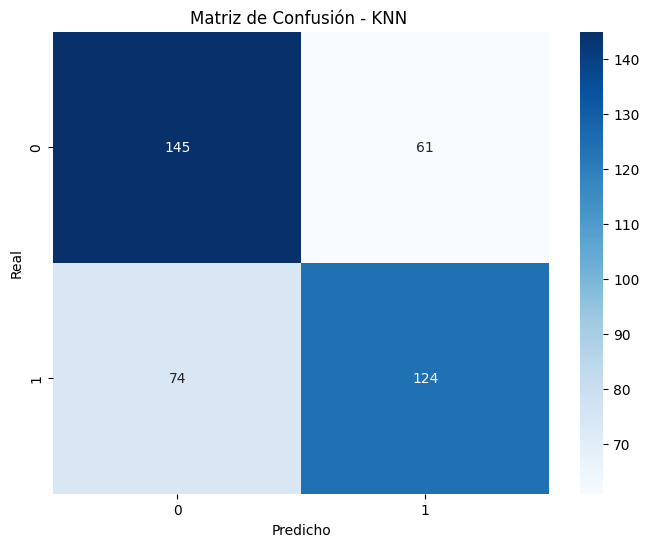

In [ ]:
cm = confusion_matrix(y_test, knn_predictions)

#Graficamos la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - KNN ')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [ ]:
# Evaluación para SVM
svm_predictions = svm_model.predict(X_test)
print("Accuracy (SVM):", accuracy_score(y_test, svm_predictions))
print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, svm_predictions))
print("Classification Report (SVM):")
print(classification_report(y_test, svm_predictions))

Accuracy (SVM): 0.655940594059406
Confusion Matrix (SVM):
[[148  58]
 [ 81 117]]
Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.65      0.72      0.68       206
           1       0.67      0.59      0.63       198

    accuracy                           0.66       404
   macro avg       0.66      0.65      0.65       404
weighted avg       0.66      0.66      0.65       404



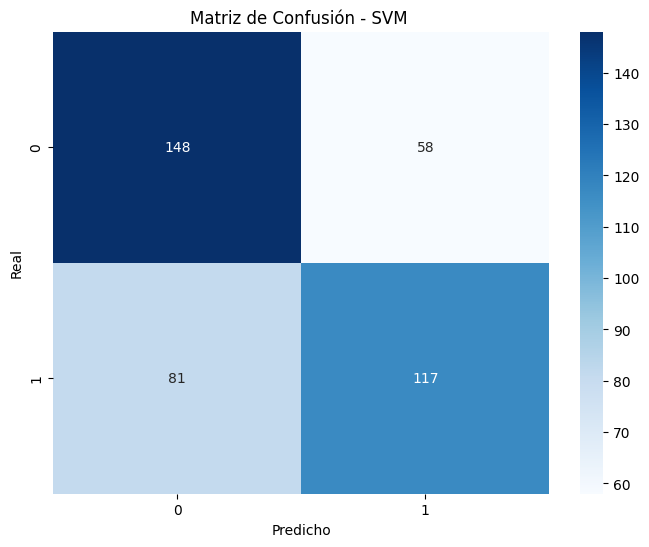

In [ ]:
cm_svm = confusion_matrix(y_test, svm_predictions)

#Graficamos la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - SVM ')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [ ]:
# Evaluación para Arbol de decision
decision_tree_predictions = decision_tree.predict(X_test)
print("Accuracy (ARBOL DECISION):", accuracy_score(y_test, decision_tree_predictions))
print("Confusion Matrix (ARBOL DECISION):")
print(confusion_matrix(y_test, decision_tree_predictions))
print("Classification Report (ARBOL DECISION):")
print(classification_report(y_test, decision_tree_predictions))

Accuracy (ARBOL DECISION): 0.6435643564356436
Confusion Matrix (ARBOL DECISION):
[[132  74]
 [ 70 128]]
Classification Report (ARBOL DECISION):
              precision    recall  f1-score   support

           0       0.65      0.64      0.65       206
           1       0.63      0.65      0.64       198

    accuracy                           0.64       404
   macro avg       0.64      0.64      0.64       404
weighted avg       0.64      0.64      0.64       404



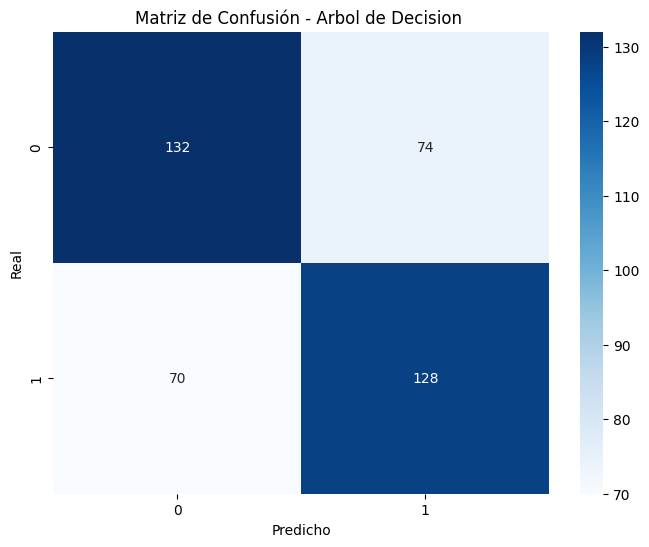

In [ ]:
cm_td = confusion_matrix(y_test, decision_tree_predictions)

#Graficamos la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_td, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Arbol de Decision ')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

In [ ]:
# Evaluación para Naive Bayes
naive_bayes_predictions = naive_bayes.predict(X_test)
print("Accuracy (Naive Bayes):", accuracy_score(y_test, naive_bayes_predictions))
print("Confusion Matrix (Naive Bayes):")
print(confusion_matrix(y_test, naive_bayes_predictions))
print("Classification Report (Naive Bayes):")
print(classification_report(y_test, naive_bayes_predictions))

Accuracy (Naive Bayes): 0.6881188118811881
Confusion Matrix (Naive Bayes):
[[157  49]
 [ 77 121]]
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       206
           1       0.71      0.61      0.66       198

    accuracy                           0.69       404
   macro avg       0.69      0.69      0.69       404
weighted avg       0.69      0.69      0.69       404



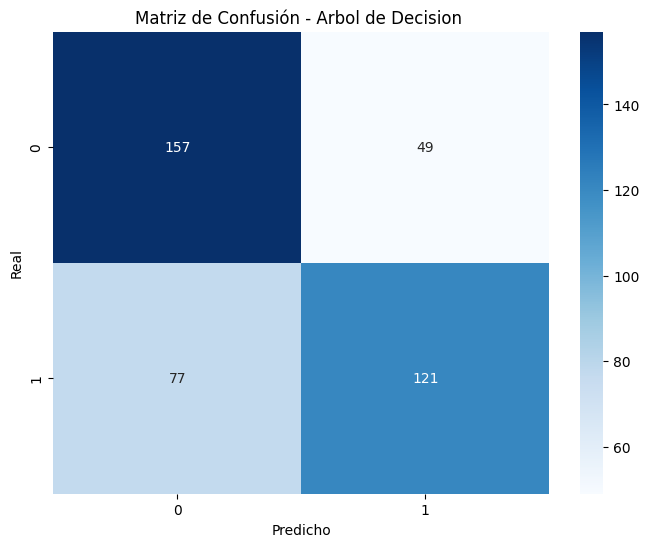

In [ ]:
cm_nb = confusion_matrix(y_test, naive_bayes_predictions)

#Graficamos la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Arbol de Decision ')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

VALIDACION

Validacion simple y cruzada k-fold KNN

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_selected_features, X, y.ravel(), cv=10)


print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.58910891 0.59405941 0.53465347 0.56930693 0.57425743 0.46534653
 0.53465347 0.5920398  0.58706468 0.58208955]
Media de los scores: 0.5622580168464607
Desviación estándar de los scores: 0.038389379520264916


In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=48)

scores = cross_val_score(knn_selected_features, X, y.ravel(), cv=cv)

print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.55693069 0.56683168 0.54342432 0.53349876 0.58064516]
Media de los scores: 0.5562661228902047
Desviación estándar de los scores: 0.01667138289459972


Validacion simple y cruzada k-fold SVM

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_model, X, y.ravel(), cv=10)


print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.61386139 0.55940594 0.53960396 0.55445545 0.57920792 0.3960396
 0.54455446 0.56716418 0.65671642 0.57711443]
Media de los scores: 0.5588123737746911
Desviación estándar de los scores: 0.06365756271830282


In [ ]:
v = KFold(n_splits=5, shuffle=True, random_state=48)

scores = cross_val_score(svm_model, X, y.ravel(), cv=cv)

print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.59158416 0.58168317 0.5483871  0.5483871  0.5235732 ]
Media de los scores: 0.5587229442547231
Desviación estándar de los scores: 0.0247232490696629


Validacion simple y cruzada k-fold Arbol de Decision

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(decision_tree, X, y.ravel(), cv=10)


print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.77722772 0.66336634 0.74257426 0.64851485 0.62376238 0.72277228
 0.63861386 0.63681592 0.69154229 0.6318408 ]
Media de los scores: 0.677703068814344
Desviación estándar de los scores: 0.05060271806177185


In [ ]:
v = KFold(n_splits=5, shuffle=True, random_state=48)

scores = cross_val_score(decision_tree, X, y.ravel(), cv=cv)

print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.7029703  0.6509901  0.6674938  0.68734491 0.70223325]
Media de los scores: 0.6822064712674741
Desviación estándar de los scores: 0.020246168188065482


Validacion simple y cruzada k-fold Naive Bayes.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(naive_bayes, X, y.ravel(), cv=10)


print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.72277228 0.65841584 0.55445545 0.58910891 0.64356436 0.32178218
 0.6039604  0.50746269 0.62189055 0.61691542]
Media de los scores: 0.5840328062657013
Desviación estándar de los scores: 0.10333248681931233


In [ ]:
v = KFold(n_splits=5, shuffle=True, random_state=48)

scores = cross_val_score(naive_bayes, X, y.ravel(), cv=cv)

print("Scores de validación cruzada:", scores)
print("Media de los scores:", scores.mean())
print("Desviación estándar de los scores:", scores.std())

Scores de validación cruzada: [0.61138614 0.61386139 0.5955335  0.63523573 0.617866  ]
Media de los scores: 0.6147765520968969
Desviación estándar de los scores: 0.012733815577388676


#Ajuste de hiperparámetros

Ahora prodecemos a ajustar los hiperpametros de cada modelo para ver si logramos alguna mejoria en las predicciones.

KNN

GRID SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

# Crear un rango de valores de k a probar
param_grid = {'n_neighbors': range(1, 20)}

# Crear un nuevo modelo KNN
knn = KNeighborsClassifier()

# Utilizar GridSearchCV para encontrar el mejor valor de k
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_selected, y)

# Mostrar el mejor valor de k encontrado
print("El mejor valor de k encontrado es:", grid_search.best_params_['n_neighbors'])

El mejor valor de k encontrado es: 18


In [ ]:
best_k = grid_search.best_params_['n_neighbors']

# Crear un nuevo modelo KNN con el mejor valor de k
knn_best = KNeighborsClassifier(n_neighbors=best_k)


knn_best.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=18)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = knn_best.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo KNN ", accuracy)

# Mostrar el reporte de clasificación y la matriz de confusión
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Precisión del modelo KNN con características seleccionadas: 0.6633663366336634
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.63      0.81      0.71       206
           1       0.72      0.52      0.60       198

    accuracy                           0.66       404
   macro avg       0.68      0.66      0.65       404
weighted avg       0.68      0.66      0.66       404

Matriz de Confusión:
[[166  40]
 [ 96 102]]


RANDOM SEARCH

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir los hiperparámetros y sus rangos para Random Search
param_dist = {
    'n_neighbors': randint(1, 20),  # Rango de vecinos
    'weights': ['uniform', 'distance']
}

# Inicializar Randomized Search para KNN
random_search_knn = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search_knn.fit(X_selected, y)

# Obtener los mejores parámetros encontrados por Randomized Search
best_params_random_knn = random_search_knn.best_params_

In [ ]:
best_params_random_knn

{'n_neighbors': 19, 'weights': 'uniform'}

In [ ]:
knn_best_params_random = KNeighborsClassifier(n_neighbors=19)

# Entrenar el modelo con las características seleccionadas
knn_best_params_random.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=19)

In [ ]:

y_pred = knn_best_params_random.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo KNN con características seleccionadas:", accuracy)

# Mostrar el reporte de clasificación y la matriz de confusión
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Precisión del modelo KNN con características seleccionadas: 0.6831683168316832
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       206
           1       0.70      0.61      0.65       198

    accuracy                           0.68       404
   macro avg       0.69      0.68      0.68       404
weighted avg       0.69      0.68      0.68       404

Matriz de Confusión:
[[155  51]
 [ 77 121]]


Aqui podemos notar que ajustando los hiperparametros en KNN, ajustando el valor de k, tanto con Grid Search como con Random Search, una mejoria en cuanto al porcentaje de prediccion que nos daba antes de ajustar dichos hiperparametros.

SVM(SUPPORT VECTOR MACHINE)

GRID SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

print("Mejores parámetros:", clf.best_params_)

print("Mejor score:", clf.best_score_)

Mejores parámetros: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Mejor score: 0.6970749306717847


In [ ]:
svc_best = SVC(C=10, gamma=0.1, kernel='rbf')
svc_best.fit(X_train, y_train)


y_pred = svc_best.predict(X_test)

print("Precision:" , accuracy)
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

Precision: 0.6831683168316832
Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.65      0.80      0.72       206
           1       0.72      0.56      0.63       198

    accuracy                           0.68       404
   macro avg       0.69      0.68      0.67       404
weighted avg       0.69      0.68      0.67       404



RANDOM SEARCH

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Definir los hiperparámetros y sus rangos para Random Search de SVM
param_dist_svm = {
    'C': uniform(0.1, 10.0),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Inicializar Randomized Search para SVM
random_search_svm = RandomizedSearchCV(SVC(), param_distributions=param_dist_svm, n_iter=10, cv=5, random_state=42)
random_search_svm.fit(X_selected, y)

# Obtener los mejores parámetros encontrados por Randomized Search para SVM
best_params_random_svm = random_search_svm.best_params_

print("Mejores parámetros:", random_search_svm.best_params_)

print("Mejor score:", random_search_svm.best_score_)

Mejores parámetros: {'C': 8.424426408004217, 'gamma': 'auto', 'kernel': 'rbf'}
Mejor score: 0.6469449426332211


In [ ]:
svc_best_random = SVC(C=8.4, gamma='auto', kernel='rbf')
svc_best_random.fit(X_train, y_train)


y_pred = svc_best_random.predict(X_test)

print("Precision:" , accuracy)
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

Precision: 0.6831683168316832
Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       206
           1       0.72      0.58      0.64       198

    accuracy                           0.68       404
   macro avg       0.69      0.68      0.68       404
weighted avg       0.69      0.68      0.68       404



ARBOL DE DECISION

GRID SEARCH

In [ ]:
# Definir parámetros para Grid Search del Árbol de decisión
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar Grid Search para el Árbol de decisión
grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5)
grid_search_tree.fit(X_selected, y)

# Obtener los mejores parámetros encontrados por Grid Search
best_params_tree = grid_search_tree.best_params_

In [ ]:
best_params_tree

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

RANDOM SEARCH

In [ ]:

param_dist_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar Randomized Search para Árbol de decisión
random_search_tree = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist_tree, n_iter=10, cv=5, random_state=42)
random_search_tree.fit(X_selected, y)

# Obtener los mejores parámetros encontrados por Randomized Search para Árbol de decisión
best_params_random_tree = random_search_tree.best_params_

In [ ]:
best_params_random_tree

{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}

Probamos primero con los parametros de Grid Search

In [ ]:
best_params_tree = {
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 2
}

# Inicializar el modelo de Árbol de decisión con los mejores parámetros
best_tree = DecisionTreeClassifier(max_depth=best_params_tree['max_depth'],
                                   min_samples_split=best_params_tree['min_samples_split'],
                                   min_samples_leaf=best_params_tree['min_samples_leaf'])


best_tree.fit(X_train, y_train)


y_pred_best_tree = best_tree.predict(X_test)

# Evaluar el rendimiento del modelo con los mejores parámetros
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calcular la precisión del modelo
accuracy_best_tree = accuracy_score(y_test, y_pred_best_tree)
print(f"Precisión del Árbol de decisión con mejores parámetros: {accuracy_best_tree:.2f}")

# Mostrar la matriz de confusión
conf_matrix_best_tree = confusion_matrix(y_test, y_pred_best_tree)
print("Matriz de confusión:")
print(conf_matrix_best_tree)

# Mostrar el reporte de clasificación con métricas adicionales
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_best_tree))

Precisión del Árbol de decisión con mejores parámetros: 0.68
Matriz de confusión:
[[146  60]
 [ 69 129]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       206
           1       0.68      0.65      0.67       198

    accuracy                           0.68       404
   macro avg       0.68      0.68      0.68       404
weighted avg       0.68      0.68      0.68       404



Ahora probamos con los parametros que nos arrojo Random Search, que son casi iguales, solo varia un parametro ({'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10})

In [ ]:
est_params_tree = {
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 2
}

# Inicializar el modelo de Árbol de decisión con los mejores parámetros
best_tree = DecisionTreeClassifier(max_depth=best_params_tree['max_depth'],
                                   min_samples_split=best_params_tree['min_samples_split'],
                                   min_samples_leaf=best_params_tree['min_samples_leaf'])


best_tree.fit(X_train, y_train)


y_pred_best_tree = best_tree.predict(X_test)

# Evaluar el rendimiento del modelo con los mejores parámetros
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calcular la precisión del modelo
accuracy_best_tree = accuracy_score(y_test, y_pred_best_tree)
print(f"Precisión del Árbol de decisión con mejores parámetros: {accuracy_best_tree:.2f}")

# Mostrar la matriz de confusión
conf_matrix_best_tree = confusion_matrix(y_test, y_pred_best_tree)
print("Matriz de confusión:")
print(conf_matrix_best_tree)

# Mostrar el reporte de clasificación con métricas adicionales
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_best_tree))

Precisión del Árbol de decisión con mejores parámetros: 0.68
Matriz de confusión:
[[140  66]
 [ 65 133]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68       206
           1       0.67      0.67      0.67       198

    accuracy                           0.68       404
   macro avg       0.68      0.68      0.68       404
weighted avg       0.68      0.68      0.68       404



Los resultados son casi los mismos con ambas pruebas.



---



#Realizamos el ensamble de los modelos por Votacion Mayoritaria, y luego la evaluación y análisis del rendimiento.

In [ ]:
from sklearn.ensemble import VotingClassifier

# Inicializar clasificador por votación
voting_clf = VotingClassifier(estimators=[('knn', knn_selected_features), ('svm', svm_model), ('dt', decision_tree)], voting='hard')
voting_clf.fit(X_train, y_train)

# Realizar predicciones con el ensamble
y_pred_ensemble = voting_clf.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Calcular la matriz de confusión del ensamble
conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print("Matriz de confusión del ensamble:")
print(conf_matrix_ensemble)

# Calcular la precisión del ensamble
precision_ensemble = precision_score(y_test, y_pred_ensemble)
print(f"Precisión del ensamble: {precision_ensemble:.2f}")

# Calcular el recall del ensamble
recall_ensemble = recall_score(y_test, y_pred_ensemble)
print(f"Recall del ensamble: {recall_ensemble:.2f}")

# Calcular el F1-score del ensamble
f1_ensemble = f1_score(y_test, y_pred_ensemble)
print(f"F1-score del ensamble: {f1_ensemble:.2f}")

Matriz de confusión del ensamble:
[[147  59]
 [ 64 134]]
Precisión del ensamble: 0.69
Recall del ensamble: 0.68
F1-score del ensamble: 0.69


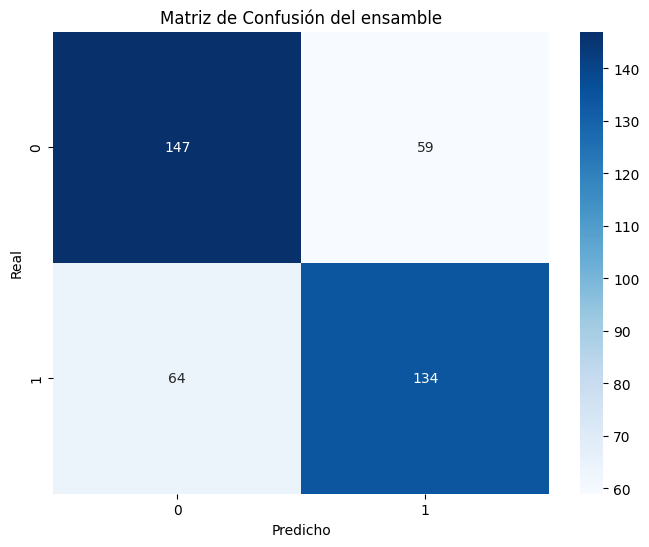

In [ ]:
cm_ensamble = confusion_matrix(y_test, y_pred_ensemble)

#Graficamos la matriz de confusion del ensamble
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensamble, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión del ensamble')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

#Conclusion final:
#La verda se nos complico en terminos de tiempo si ya ve ustede a la hora en la que enviamos el archivo
#pero al final los porsentajes de prediccion de todos los modelos es alrededor del 70%